In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

data = pd.read_csv('stud_math.xls')

data.rename(columns = {
    'Pstatus': 'pstatus',
    'Medu': 'medu',
    'Fedu': 'fedu',
    'Mjob': 'mjob',
    'Fjob': 'fjob',
    'studytime, granular': 'studytime_g'
}, inplace = True)

data.info()
# Почти во всех столбцах есть пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          395 non-null    int64  
 3   address      378 non-null    object 
 4   famsize      368 non-null    object 
 5   pstatus      350 non-null    object 
 6   medu         392 non-null    float64
 7   fedu         371 non-null    float64
 8   mjob         376 non-null    object 
 9   fjob         359 non-null    object 
 10  reason       378 non-null    object 
 11  guardian     364 non-null    object 
 12  traveltime   367 non-null    float64
 13  studytime    388 non-null    float64
 14  failures     373 non-null    float64
 15  schoolsup    386 non-null    object 
 16  famsup       356 non-null    object 
 17  paid         355 non-null    object 
 18  activities   381 non-null    object 
 19  nursery 

In [3]:
pd.DataFrame(data.school.value_counts())

,school
GP,349
MS,46


In [4]:
pd.DataFrame(data.sex.value_counts())

,sex
F,208
M,187


In [5]:
pd.DataFrame(data.age.value_counts())

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

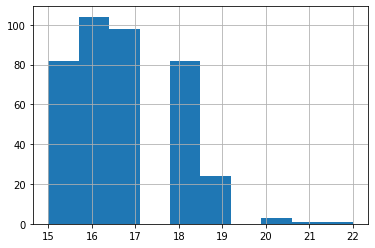

In [6]:
data.age.hist()
data.age.describe()

In [7]:
pd.DataFrame(data.address.value_counts())

,address
U,295
R,83


In [8]:
pd.DataFrame(data.famsize.value_counts())

,famsize
GT3,261
LE3,107


In [9]:
pd.DataFrame(data.pstatus.value_counts())

,pstatus
T,314
A,36


In [10]:
pd.DataFrame(data.medu.value_counts())

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

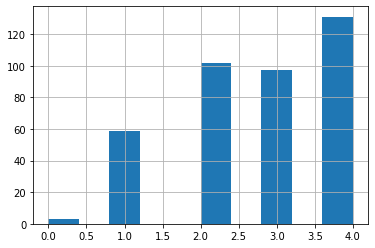

In [11]:
data.medu.hist()
data.medu.describe()

In [12]:
# Фильтруем некорректные данные
data = data.loc[data.fedu <= 4]
pd.DataFrame(data.fedu.value_counts())

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

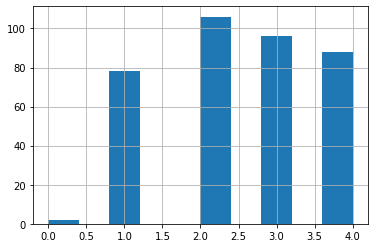

In [13]:
data.fedu.hist()
data.fedu.describe()

In [14]:
pd.DataFrame(data.mjob.value_counts())

,mjob
other,125
services,90
at_home,57
teacher,48
health,31


In [15]:
pd.DataFrame(data.fjob.value_counts())

,fjob
other,189
services,94
teacher,26
at_home,14
health,13


In [16]:
pd.DataFrame(data.reason.value_counts())

,reason
course,128
reputation,98
home,96
other,32


In [17]:
pd.DataFrame(data.guardian.value_counts())

,guardian
mother,236
father,78
other,26


In [18]:
pd.DataFrame(data.traveltime.value_counts())

,traveltime
1.0,225
2.0,92
3.0,21
4.0,7


count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

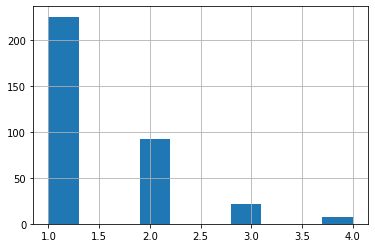

In [19]:
data.traveltime.hist()
data.traveltime.describe()

In [20]:
pd.DataFrame(data.studytime.value_counts())

,studytime
2.0,182
1.0,98
3.0,58
4.0,25


count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

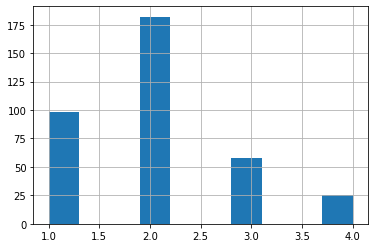

In [21]:
data.studytime.hist()
data.studytime.describe()

In [22]:
pd.DataFrame(data.failures.value_counts())

,failures
0.0,277
1.0,45
3.0,15
2.0,14


count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

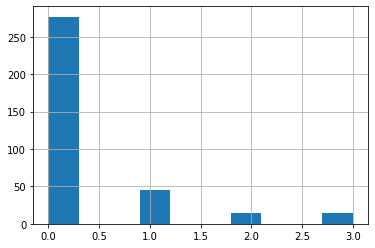

In [23]:
data.failures.hist()
data.failures.describe()

In [24]:
pd.DataFrame(data.schoolsup.value_counts())

,schoolsup
no,314
yes,47


In [25]:
pd.DataFrame(data.famsup.value_counts())

,famsup
yes,204
no,131


In [26]:
pd.DataFrame(data.paid.value_counts())

,paid
no,188
yes,145


In [27]:
pd.DataFrame(data.activities.value_counts())

,activities
yes,180
no,176


In [28]:
pd.DataFrame(data.nursery.value_counts())

,nursery
yes,279
no,75


In [29]:
pd.DataFrame(data.higher.value_counts())

,higher
yes,333
no,19


In [30]:
pd.DataFrame(data.internet.value_counts())

,internet
yes,283
no,54


In [31]:
pd.DataFrame(data.romantic.value_counts())

,romantic
no,226
yes,116


In [32]:
# Фильтруем некорректные данные
data = data.loc[data.famrel > 0]
pd.DataFrame(data.famrel.value_counts())

,famrel
4.0,168
5.0,95
3.0,59
2.0,16
1.0,7


count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

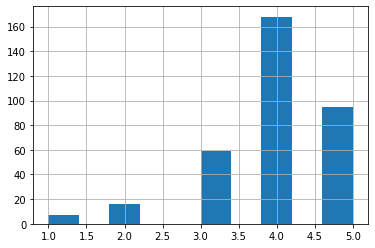

In [33]:
data.famrel.hist()
data.famrel.describe()

In [34]:
pd.DataFrame(data.freetime.value_counts())

,freetime
3.0,134
4.0,97
2.0,54
5.0,34
1.0,17


count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

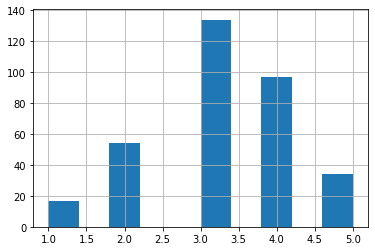

In [35]:
data.freetime.hist()
data.freetime.describe()

In [36]:
pd.DataFrame(data.goout.value_counts())

,goout
3.0,115
2.0,87
4.0,71
5.0,45
1.0,19


count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

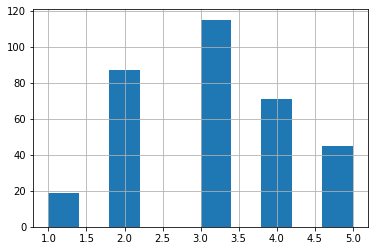

In [37]:
data.goout.hist()
data.goout.describe()

In [38]:
pd.DataFrame(data.health.value_counts())

,health
5.0,111
3.0,81
4.0,58
1.0,42
2.0,40


count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

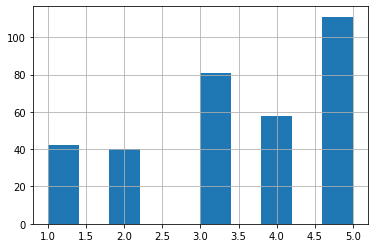

In [39]:
data.health.hist()
data.health.describe()

In [40]:
# Отсекаем очевидные выбросы
data = data.loc[data.absences <= 30]
pd.DataFrame(data.absences.value_counts())

,absences
0.0,95
2.0,54
4.0,47
6.0,27
8.0,21
10.0,14
12.0,11
14.0,9
3.0,8
16.0,7


count    327.000000
mean       5.048930
std        5.722954
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       28.000000
Name: absences, dtype: float64

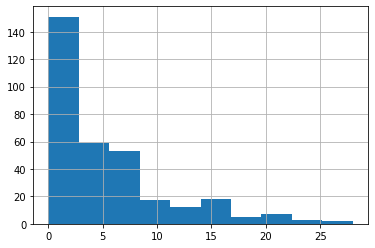

In [41]:
data.absences.hist()
data.absences.describe()

In [42]:
# Важный столбец
pd.DataFrame(data.score.value_counts())

,score
50.0,50
55.0,40
0.0,30
65.0,28
75.0,25
60.0,25
70.0,23
40.0,22
45.0,19
80.0,16


count    322.000000
mean      52.204969
std       22.519253
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

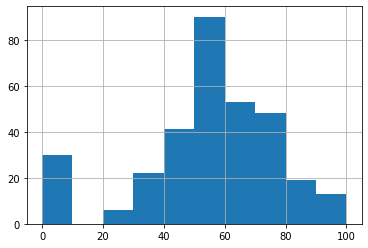

In [43]:
data.score.hist()
data.score.describe()

In [44]:
# В данных есть выбросы - проверяем
IQR = data.score.quantile(0.75) - data.score.quantile(0.25)
perc25 = data.score.quantile(0.25)
perc75 = data.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 45.0, 75-й перцентиль: 65.0, IQR: 20.0,  Границы выбросов: [15.0, 95.0].


count    291.000000
mean      57.422680
std       15.626791
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max       95.000000
Name: score, dtype: float64

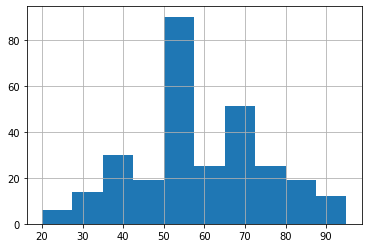

In [45]:
# Фильтруем данные
data = data.loc[data.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
data.score.hist()
data.score.describe()

In [46]:
# Проверяем корреляцию и отсекаем studytime_g, как коррелирующийся с studytime
data.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_g,famrel,freetime,goout,health,absences,score
age,1.000000,-0.124188,-0.144055,0.080533,-0.012497,0.237409,0.012497,0.047078,-0.016062,0.076239,-0.055298,0.185946,-0.119534
medu,-0.124188,1.000000,0.633485,-0.171897,0.071860,-0.190498,-0.071860,-0.018758,-0.009669,0.075722,-0.079663,0.120161,0.174431
fedu,-0.144055,0.633485,1.000000,-0.181406,-0.022068,-0.274471,0.022068,-0.025211,-0.024287,0.023777,0.002909,0.022923,0.133476
traveltime,0.080533,-0.171897,-0.181406,1.000000,-0.113151,0.094867,0.113151,-0.057652,0.008055,0.007737,0.009486,-0.032708,-0.081131
studytime,-0.012497,0.071860,-0.022068,-0.113151,1.000000,-0.135398,-1.000000,0.038788,-0.111504,-0.033397,-0.098389,-0.079648,0.127026
failures,0.237409,-0.190498,-0.274471,0.094867,-0.135398,1.000000,0.135398,0.022824,0.138133,0.110722,0.050574,0.171141,-0.261903
studytime_g,0.012497,-0.071860,0.022068,0.113151,-1.000000,0.135398,1.000000,-0.038788,0.111504,0.033397,0.098389,0.079648,-0.127026
famrel,0.047078,-0.018758,-0.025211,-0.057652,0.038788,0.022824,-0.038788,1.000000,0.150580,0.038632,0.131819,-0.093990,0.053135
freetime,-0.016062,-0.009669,-0.024287,0.008055,-0.111504,0.138133,0.111504,0.150580,1.000000,0.265582,0.100997,0.016752,-0.004004
goout,0.076239,0.075722,0.023777,0.007737,-0.033397,0.110722,0.033397,0.038632,0.265582,1.000000,-0.010310,0.094829,-0.175859


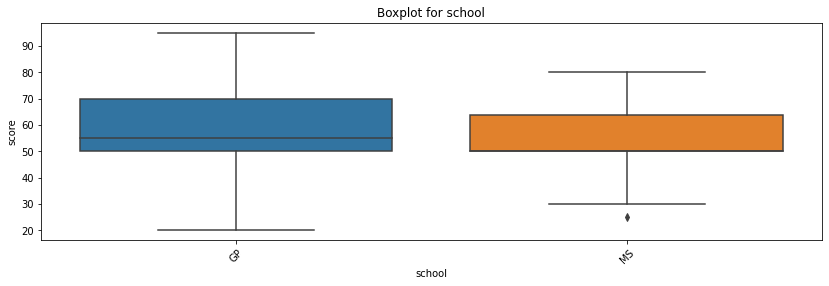

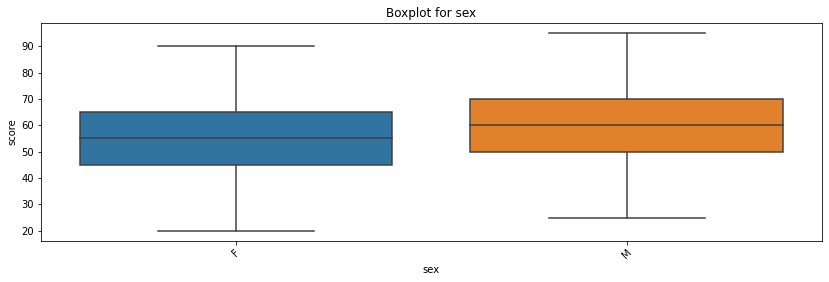

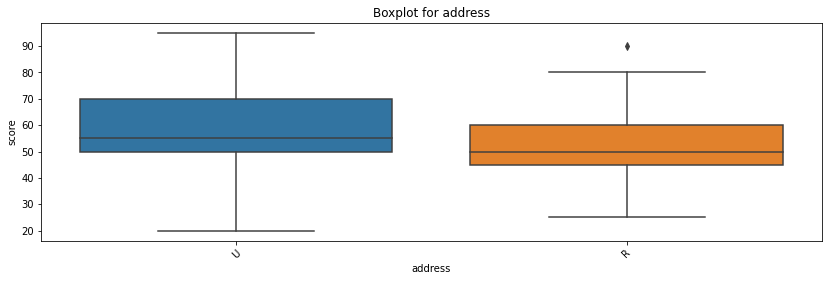

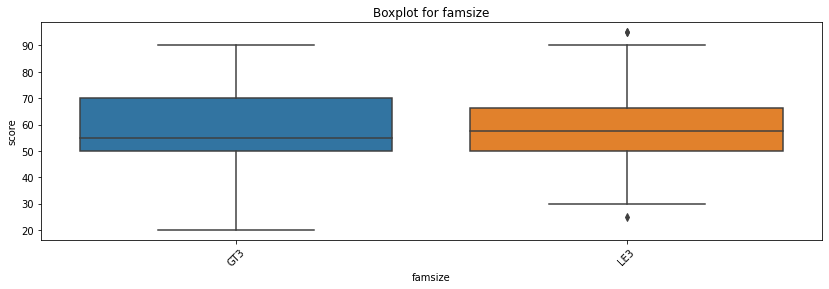

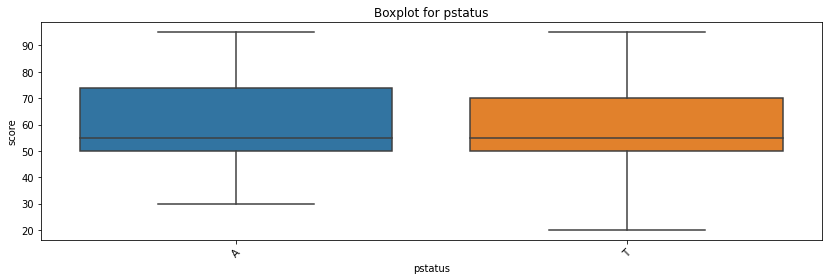

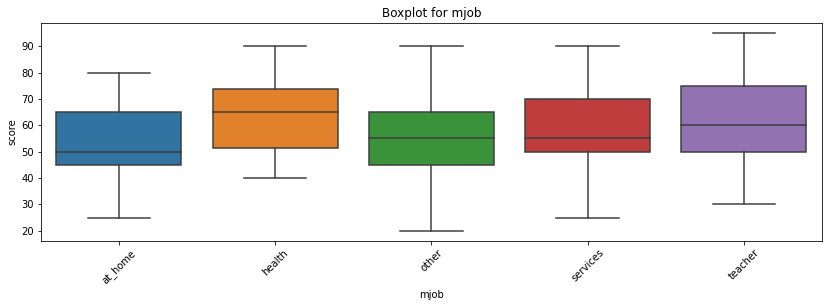

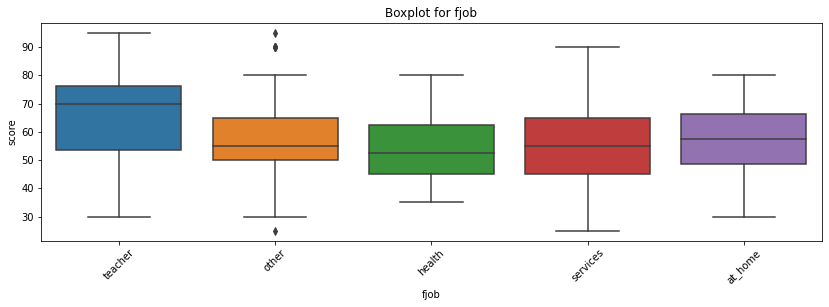

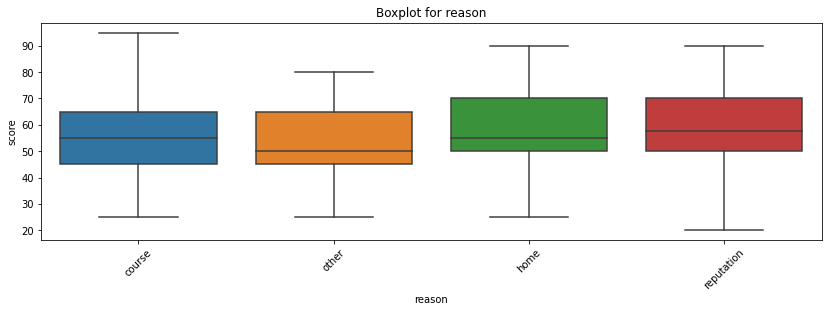

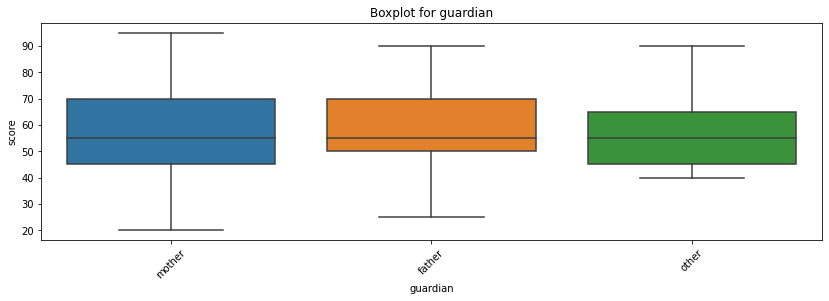

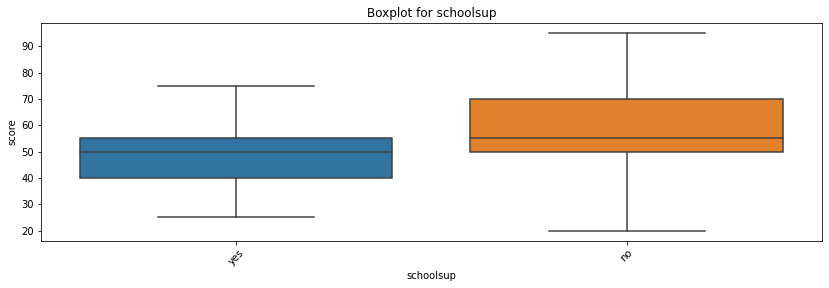

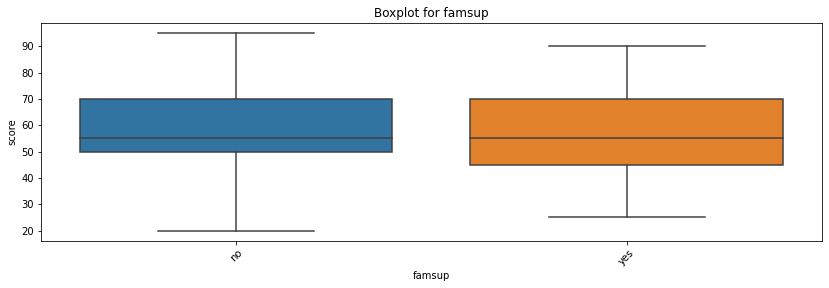

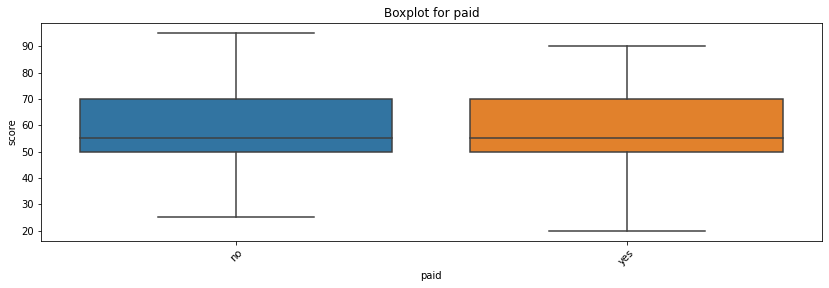

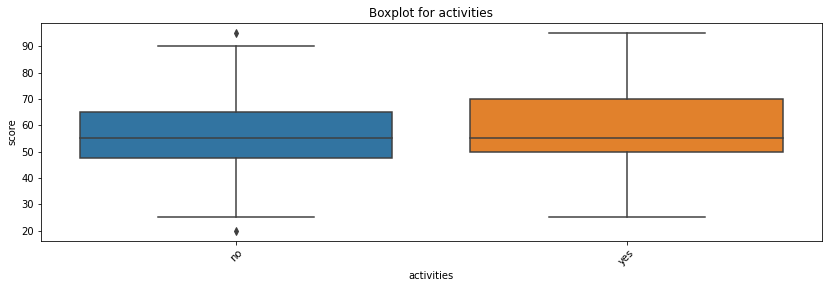

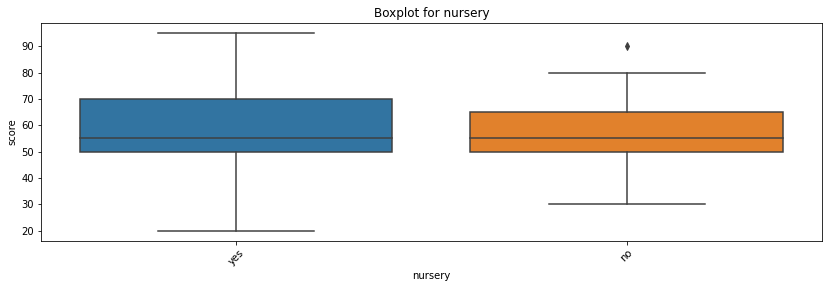

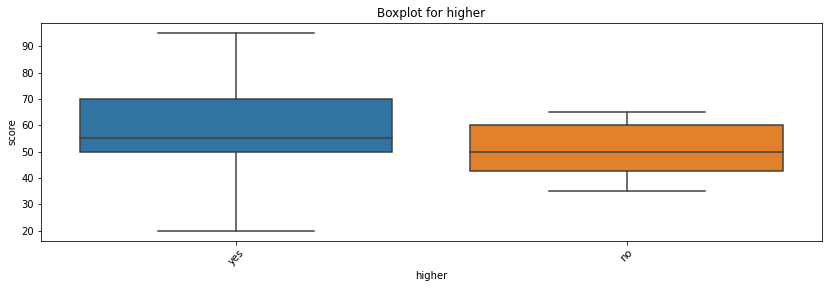

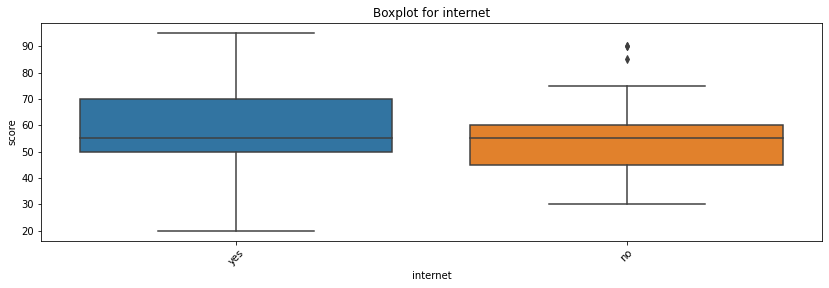

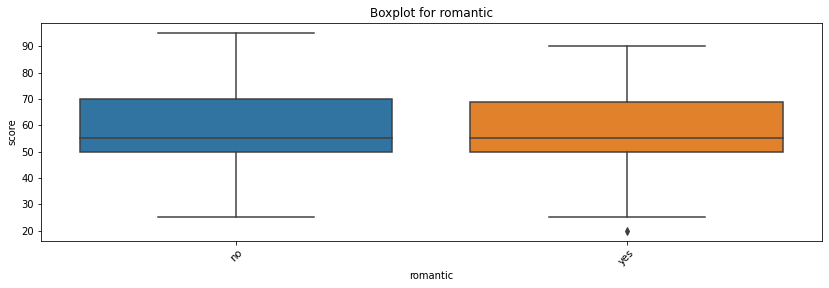

In [47]:
# Анализируем номинативные переменные
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 
            'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [48]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in ['school', 'address', 'mjob', 'fjob', 'schoolsup', 'higher', 'internet']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup


In [49]:
# Вывод важных переменные, которые, возможно, оказывают влияние на балл
data_for_model = data.loc[:, ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'address', 'schoolsup']]
data_for_model.head()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,address,schoolsup
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,U,yes
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,U,no
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,U,yes
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,U,no
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,U,no
